In [5]:
# 导入verification模块
import verif

In [6]:
# 示例数据准备
import pandas as pd
f_pred = "pred_tmax.csv"
f_obs = "obs_tmax.csv"
obs = pd.read_csv(f_obs)
pred = pd.read_csv(f_pred)
obs.index = pd.to_datetime(obs['Date'], format='%d/%m/%Y')
obs = obs.drop('Date', 1)
pred.index = pd.to_datetime(pred['Date'], format='%d/%m/%Y')
pred = pred.drop('Date', 1)

data1 = list(obs['54511'])[:60]
data2 = list(pred['54511'])[2:62]

In [7]:
# 单纯数据对比及评估
# 两列数据 data1, data2
verif_standard = verif.VerifStandard(data1, data2)
print(data1)
print(data2)

[15.1, 14.4, 12.4, 11.199999999999999, 9.9000000000000004, 8.5, 13.4, 17.399999999999999, 19.300000000000001, 19.899999999999999, 17.0, 18.300000000000001, 15.300000000000001, 19.600000000000001, 16.800000000000001, 18.800000000000001, 22.199999999999999, 23.100000000000001, 25.5, 21.699999999999999, 20.0, 24.899999999999999, 21.199999999999999, 18.300000000000001, 15.0, 19.800000000000001, 21.600000000000001, 26.0, 23.199999999999999, 27.800000000000001, 31.100000000000001, 26.300000000000001, 25.600000000000001, 23.5, 20.800000000000001, 23.300000000000001, 22.5, 26.399999999999999, 24.100000000000001, 23.300000000000001, 20.699999999999999, 17.5, 28.800000000000001, 30.600000000000001, 33.5, 29.600000000000001, 26.699999999999999, 29.300000000000001, 26.5, 24.800000000000001, 22.300000000000001, 28.899999999999999, 30.899999999999999, 30.800000000000001, 28.300000000000001, 31.600000000000001, 27.699999999999999, 29.100000000000001, 28.100000000000001, 27.899999999999999]
[11.0, 9.0

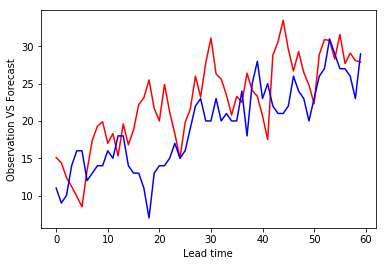

In [3]:
# 1- 数据展示
verif_standard.eyeball()

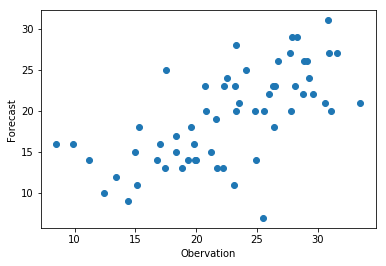

In [4]:
# 2- 散点图
verif_standard.continuous_scatter()

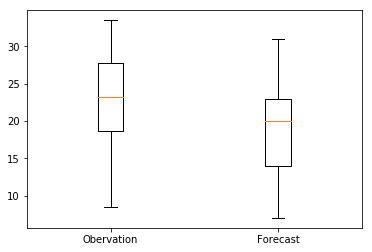

In [5]:
# 3- 盒图
verif_standard.continuous_box()

In [6]:
# 4- MAE, RMSE, R等统计值计算
stats = verif.StatsUtils(data2, data1)
print("MAE, RMSE, R")
print(stats.mae(), stats.rmse(), stats.r())

MAE, RMSE, R
4.65833333333 5.8911939933 0.648293847149


In [9]:
# 5- 高温事件(>=32C)预报准确率
results, cols = verif_standard.dichotomous(['PC'], 32, 'ge')
print(cols)
print(results)

['PC']
[98.33333333333333]


In [12]:
# 多站点，有缺测数据对比及评估
stations = ['54511', '58362']

pred.head(4)

,54511,58362,58562,57083,57494
Date,,,,,
2017-03-03,11.0,15.0,14.0,16.0,11.0
2017-03-04,10.0,13.0,12.0,12.0,13.0
2017-03-05,11.0,10.0,11.0,14.0,14.0
2017-03-06,9.0,13.0,12.0,13.0,15.0


In [13]:
obs.head(4)

,54511,58362,58562,58370,57083,57494
Date,,,,,,
2017-03-01,15.1,12.2,15.3,12.5,15.8,15.3
2017-03-02,14.4,14.7,15.9,13.4,21.0,17.8
2017-03-03,12.4,18.4,20.5,19.8,17.3,14.6
2017-03-04,11.2,13.2,15.1,12.4,13.8,14.9


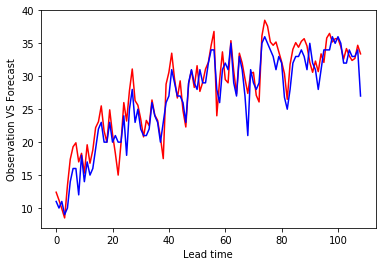

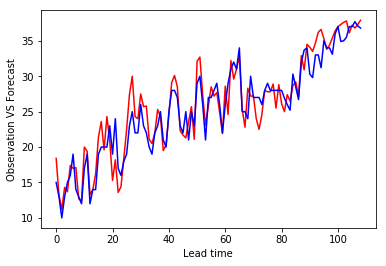

the obs-forecast figure of the 2 stations:


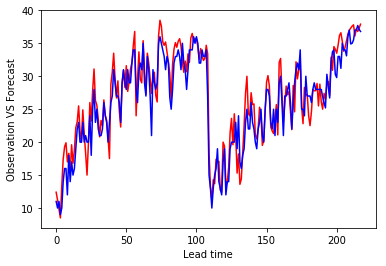

In [15]:
# 1- 展示stations[0]、 stations[1] 以及 stations[:]
verif.verif(stations, obs, pred, Eyeball=True)

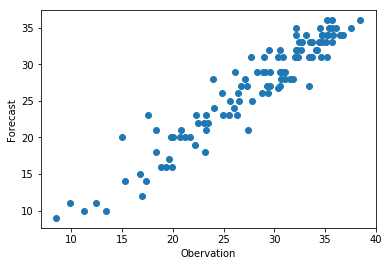

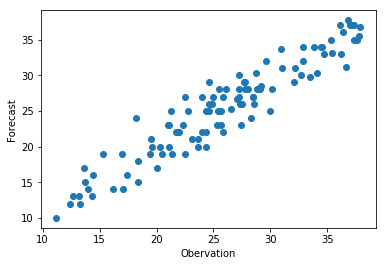

the obs-forecast figure of the 2 stations:


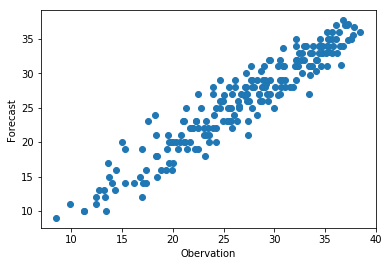

In [14]:
# 2- 散点图 stations[0]、 stations[1] 以及 stations[:]
verif.verif(stations, obs, pred, CONT_Scatter=True)

In [8]:
# 3- 保存每个评估结果到文件 并输出所有站点总体情况
# 包括气温预报准确率、 高温事件预报准确率、RMSE等统计值
stations = ['54511', '58362']
verif.verif(stations, obs, pred,  \
            TMP_CMA=True, TMP_CMA_output="test",  \
            CONT_Stats=True, statistics=['RMSE', 'R', 'MAE'], CONT_Stats_output="test",  \
            Dichotomous=True, scores = ['TS', 'PC', 'FAR'], threshold=32, operator='ge', Dichotomous_output="test")

The verification scores for all the 2 stations:
   PC(<=2℃)  PC(<=1℃)
0  0.573394  0.330275
The verification scores for all the 2 stations:
          TS         PC       FAR
0  73.529412  91.743119  7.407407
The verification summary for all the 2 stations:
       RMSE
0  2.312094


In [9]:
ls verif*csv

verif_continuous_test.csv
verif_dichotomous_test_ge_32.csv
verif_temperature_accuracy_cma_test.csv


In [10]:
# 气温预报准确率
df = pd.read_csv("verif_temperature_accuracy_cma_test.csv")
print(df)

   station  PC(<=2℃)  PC(<=1℃)  站名         lon   lat
0    54511  0.550459  0.330275  北京  116.466667  39.8
1    58362  0.596330  0.330275  宝山  121.483333  31.4


In [11]:
# 高温事件预报准确率
df = pd.read_csv("verif_dichotomous_test_ge_32.csv")
print(df)

   station         TS         PC       FAR  站名         lon   lat
0    54511  75.609756  90.825688  6.060606  北京  116.466667  39.8
1    58362  70.370370  92.660550  9.523810  宝山  121.483333  31.4


In [12]:
# RMSE等统计值
df = pd.read_csv("verif_continuous_test.csv")
print(df)

   station      RMSE  站名         lon   lat
0    54511  2.391614  北京  116.466667  39.8
1    58362  2.229741  宝山  121.483333  31.4


In [16]:
#